### Лабораторная работа № 3 ###
#### Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных ####
**Цель лабораторной работы:** изучение способов предварительной обработки данных для дальнейшего формирования моделей.

Выполнил: Ханмурзин Тагир ИУ5-64

1.Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)  

2.Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:    
* обработку пропусков в данных;
* кодирование категориальных признаков;
* масштабирование данных.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.shape # Узнаём размер датасета

(32561, 15)

In [8]:
data.dtypes # Список колонок с типами данных

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Обработка пропусков в данных ###

In [10]:
# Удаление строк, содержащих пустые значения
dataAct1 = data.dropna(axis=0, how='any')
(data.shape, dataAct1.shape)

((32561, 15), (32561, 15))

### Кодирование категориальных признаков ###

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
typeData = data[['education']]
typeData.head()

,education
0,Bachelors
1,Bachelors
2,HS-grad
3,11th
4,Bachelors


In [13]:
typeData.shape

(32561, 1)

In [14]:
typeData = typeData['education'].unique()

In [15]:
dataAct2 = pd.DataFrame({'c1':typeData})
dataAct2

,c1
0,Bachelors
1,HS-grad
2,11th
3,Masters
4,9th
5,Some-college
6,Assoc-acdm
7,Assoc-voc
8,7th-8th
9,Doctorate


In [16]:
le = LabelEncoder()
dataAct3 = le.fit_transform(dataAct2['c1'])

In [17]:
np.unique(dataAct3)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [18]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [19]:
le.inverse_transform([14])

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Prof-school'], dtype=object)

### Масштабирование данных ###

In [91]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [124]:
sc1 = StandardScaler()
sc1_data = sc1.fit_transform(data[['age']])

# data['age'].value_counts()

Обычный вывод, без масштабирования

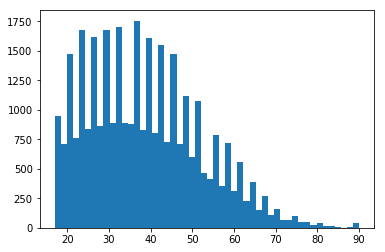

In [127]:
plt.hist(data['age'], 50)
plt.show()

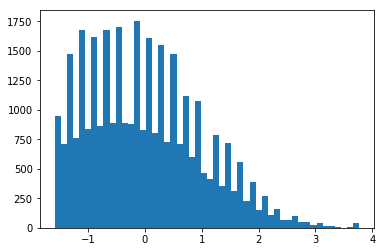

In [128]:
plt.hist(sc1_data, 50)
plt.show()